In [2]:
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import pandas as pd
import json
import zipfile
import ast

zip_filename = 'recipes_cleaned.zip'
file_inside_zip = 'recipes_cleaned.json'

# Open the ZIP file and read the file inside it
with zipfile.ZipFile(zip_filename, 'r') as zipf:
    with zipf.open(file_inside_zip) as file:
        data = file.read().decode('utf-8')

recipes = json.loads(data)

recipe_descriptions = [i['description'] for i in recipes]

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=5)
recipe_tfidf = vectorizer.fit_transform(recipe_descriptions)

k = 40  # Same as class demo
U, s, vt = svds(recipe_tfidf, k=k)
recipe_vectors = normalize(U, axis=1)

def clean_recipe_data(recipe):
    return {
        'name': recipe['name'],
        'description': recipe['description'],
        'ingredients': ast.literal_eval(recipe['ingredients'])
    }

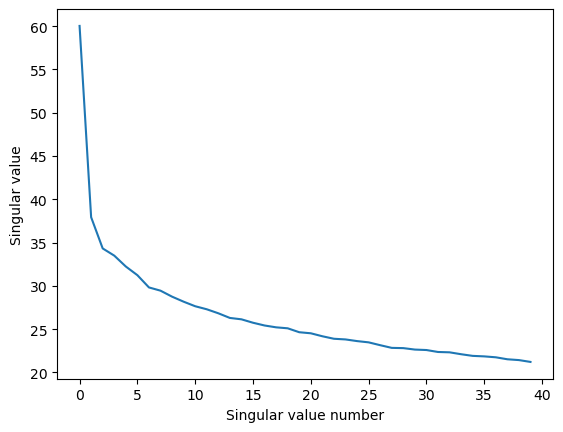

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()